In [0]:
import pandas as pd
import numpy as np
import time
import nltk
import warnings
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
warnings.filterwarnings(action = 'ignore') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
%time las_vegas_data= pd.read_pickle('/content/drive/My Drive/las_vegas_data_tokenized_final.pkl')
las_vegas_data.head(3)

In [0]:
%time las_vegas_data['bigrams']=las_vegas_data['imp_tags'].apply(lambda row: list(nltk.ngrams(row, 2)))

CPU times: user 18.5 s, sys: 1.69 s, total: 20.1 s
Wall time: 20.1 s


In [0]:
las_vegas_data['bigrams'].tolist()[:5]

[[('found', 'gem'),
  ('gem', 'man'),
  ('man', 'coworker'),
  ('coworker', 'used'),
  ('used', 'live'),
  ('live', 'apt'),
  ('apt', 'complex'),
  ('complex', 'live'),
  ('live', 'mile'),
  ('mile', 'away'),
  ('away', 'apt'),
  ('apt', 'finally'),
  ('finally', 'gave'),
  ('gave', 'try'),
  ('try', 'back'),
  ('back', 'delicious'),
  ('delicious', 'chip'),
  ('chip', 'mini'),
  ('mini', 'tortilla'),
  ('tortilla', 'break'),
  ('break', 'salsa'),
  ('salsa', 'yum'),
  ('yum', 'food'),
  ('food', 'delicious'),
  ('delicious', 'dont'),
  ('dont', 'remember'),
  ('remember', 'last'),
  ('last', 'time'),
  ('time', 'went'),
  ('went', 'managed'),
  ('managed', 'finish'),
  ('finish', 'half'),
  ('half', 'take'),
  ('take', 'home'),
  ('home', 'taste'),
  ('taste', 'better'),
  ('better', 'later'),
  ('later', 'imo'),
  ('imo', 'portion'),
  ('portion', 'generous'),
  ('generous', 'filling'),
  ('filling', 'wait'),
  ('wait', 'staff'),
  ('staff', 'always'),
  ('always', 'nice'),
  ('nice'

In [0]:
start= time.time()
vector = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False, max_features=500)
vectorizer= vector.fit_transform(las_vegas_data['bigrams'])
print("Time to load data: {} seconds".format(time.time() - start))

Time to load data: 117.60746192932129 seconds


In [0]:
X=vectorizer
y=las_vegas_data['label']

In [0]:
svm = LinearSVC(dual=False, max_iter=10000, C=1).fit(X, y)

In [0]:
{k: v for k, v in sorted(vector.vocabulary_.items(), key=lambda item: item[1], reverse=True)}

In [0]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(20, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 one,two= list(zip(*feature_names[top_coefficients]))
 top_words = [i + ' '+ j for i, j in zip(one, two)] 
 plt.xticks(np.arange(0, 1 + 2 * top_features), top_words, rotation=60, ha='right', fontsize=14)
 plt.ylabel('weights of words')
 plt.title('Bigram: Top 20 positive and negative words\n')  
 plt.show()

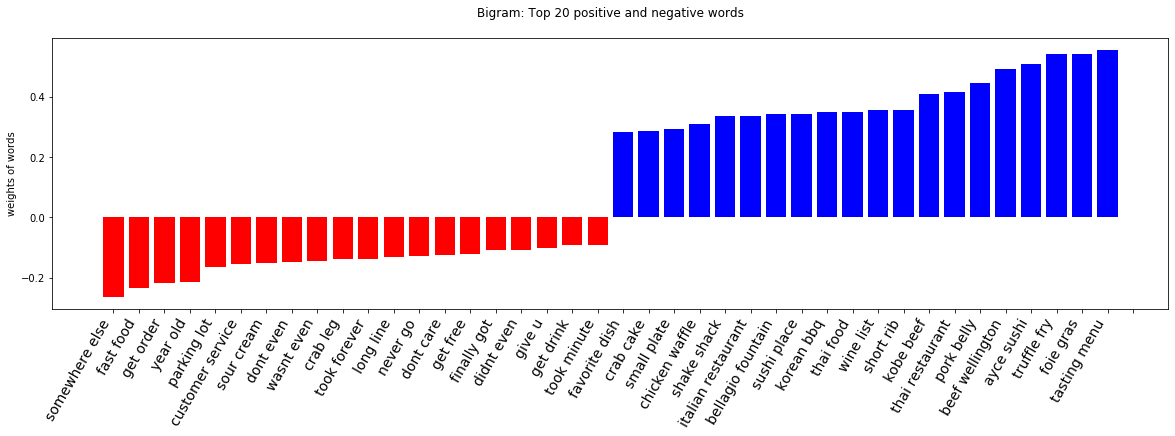

In [0]:
plot_coefficients(svm, vector.get_feature_names())

**Trigram**

In [0]:
%time las_vegas_data['trigrams']=las_vegas_data['imp_tags'].apply(lambda row: list(nltk.ngrams(row, 3)))

CPU times: user 17.4 s, sys: 1.54 s, total: 19 s
Wall time: 19 s


In [0]:
start= time.time()
vector = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False, max_features=500)
vectorizer= vector.fit_transform(las_vegas_data['trigrams'])
print("Time to load data: {} seconds".format(time.time() - start))

Time to load data: 352.5107502937317 seconds


In [0]:
X=vectorizer
y=las_vegas_data['label']

In [0]:
svm = LinearSVC(dual=False, max_iter=10000, C=1).fit(X, y)

In [0]:
def plot_coefficients_trigram(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(20, 5))
 colors = ['orange' if c < 0 else 'green' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 one,two, three= list(zip(*feature_names[top_coefficients]))
 top_words = [i + ' '+ j + ' ' + k for i, j,k  in zip(one, two, three)] 
 plt.xticks(np.arange(0, 1 + 2 * top_features), top_words, rotation=60, ha='right', fontsize=14)
 plt.ylabel('weights of words')
 plt.title('Trigram: Top 20 positive and negative words\n')  
 plt.show()

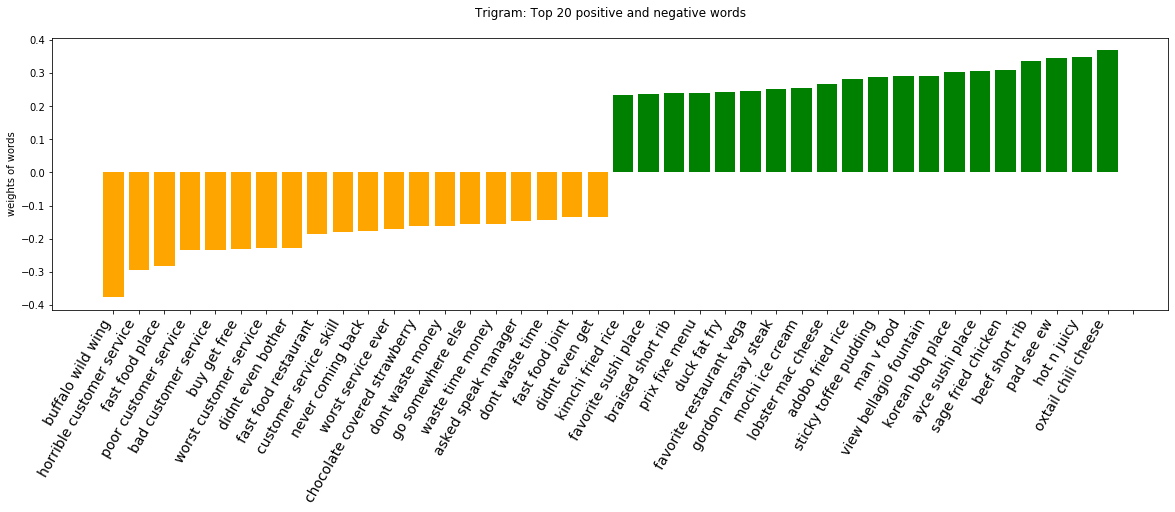

In [0]:
plot_coefficients_trigram(svm, vector.get_feature_names())

In [0]:
las_vegas_data.to_pickle('/content/drive/My Drive/las_vegas_data_ngrams.pkl')